<a href="https://colab.research.google.com/github/cardazuluaga/DLCourse/blob/main/Ej5UnderOverfit_Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

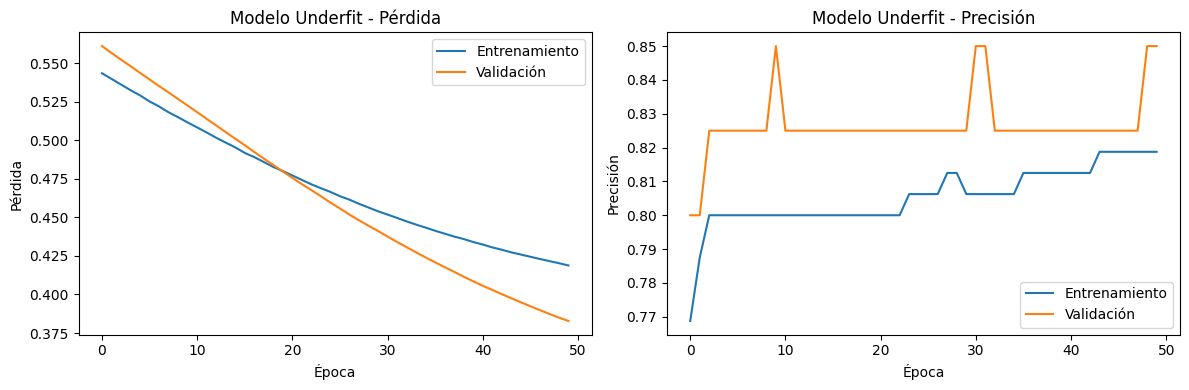

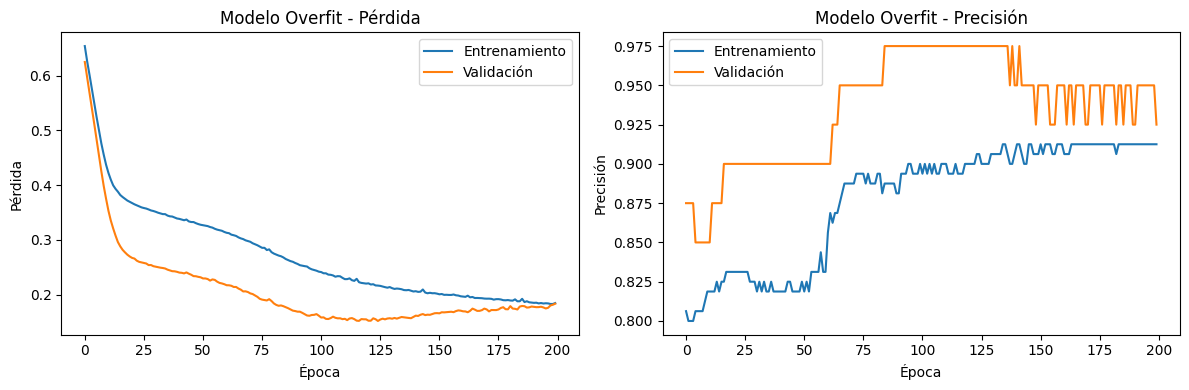

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Generar un conjunto de datos sintético
X, y = make_moons(n_samples=200, noise=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear un MLP simple
def create_mlp_model_simple():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(8, activation='relu', input_dim=2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_mlp_model_complex():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation='relu', input_dim=2),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Entrenar un modelo con underfitting (demasiado simple)
model_underfit = create_mlp_model_simple()
history_underfit = model_underfit.fit(X_train, y_train, epochs=50, verbose=0, validation_data=(X_test, y_test))

# Entrenar un modelo con overfitting (demasiado complejo)
model_overfit = create_mlp_model_complex()
history_overfit = model_overfit.fit(X_train, y_train, epochs=200, verbose=0, validation_data=(X_test, y_test))

# Función para graficar las curvas de aprendizaje
def plot_learning_curves(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Entrenamiento')
    plt.plot(history.history['val_loss'], label='Validación')
    plt.title(f'{title} - Pérdida')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Validación')
    plt.title(f'{title} - Precisión')
    plt.xlabel('Época')
    plt.ylabel('Precisión')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Graficar las curvas de aprendizaje para underfit y overfit
plot_learning_curves(history_underfit, 'Modelo Underfit')
plot_learning_curves(history_overfit, 'Modelo Overfit')